<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regresja" data-toc-modified-id="Regresja-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regresja</a></span><ul class="toc-item"><li><span><a href="#Dane" data-toc-modified-id="Dane-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dane</a></span></li><li><span><a href="#Budowa-modelu" data-toc-modified-id="Budowa-modelu-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Budowa modelu</a></span></li><li><span><a href="#Trening-i-test" data-toc-modified-id="Trening-i-test-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Trening i test</a></span></li><li><span><a href="#Wnioski" data-toc-modified-id="Wnioski-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Wnioski</a></span></li></ul></li>

Regresja i klasyfikacja z wykorzystaniem biblioteki KERAS

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Regresja
Zadanie polega na stworzeniu modelu regresji do przewidywania cen nieruchomości w ramach datasetu _boston_

### Dane
- wczytać zbiór ```tf.keras.datasets.boston_housing.load_data()```
- krótka eksploracja

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

In [3]:
# sprawdzenie ilości featerów
x_train.shape

(404, 13)

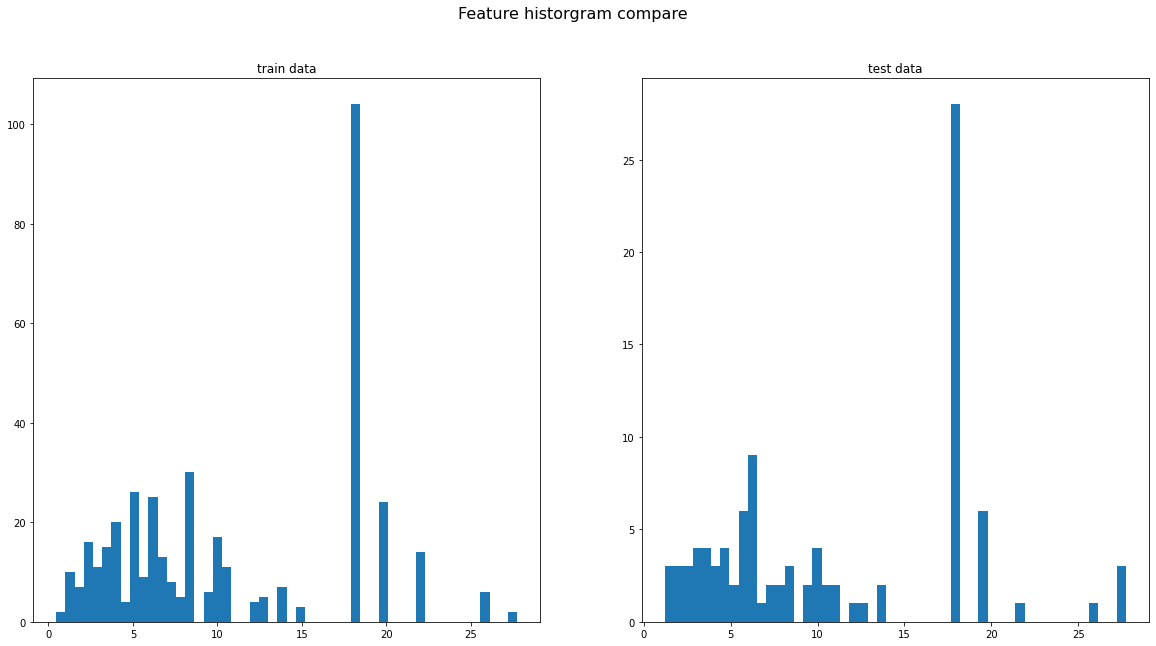

In [4]:
# porównanie charakteru danych treningowych i testowych
# numer cechy
n = 2
# kontener na wykresy
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Feature historgram compare', fontsize=16)
# wykres treningowego
ax[0].hist(x_train[:,n], bins=50)
ax[0].set_title('train data')
# wykres testowego
ax[1].hist(x_test[:,n], bins=50)
ax[1].set_title('test data')

plt.show()

In [5]:
# sprawdzenie wyjścia
y_train.shape

(404,)

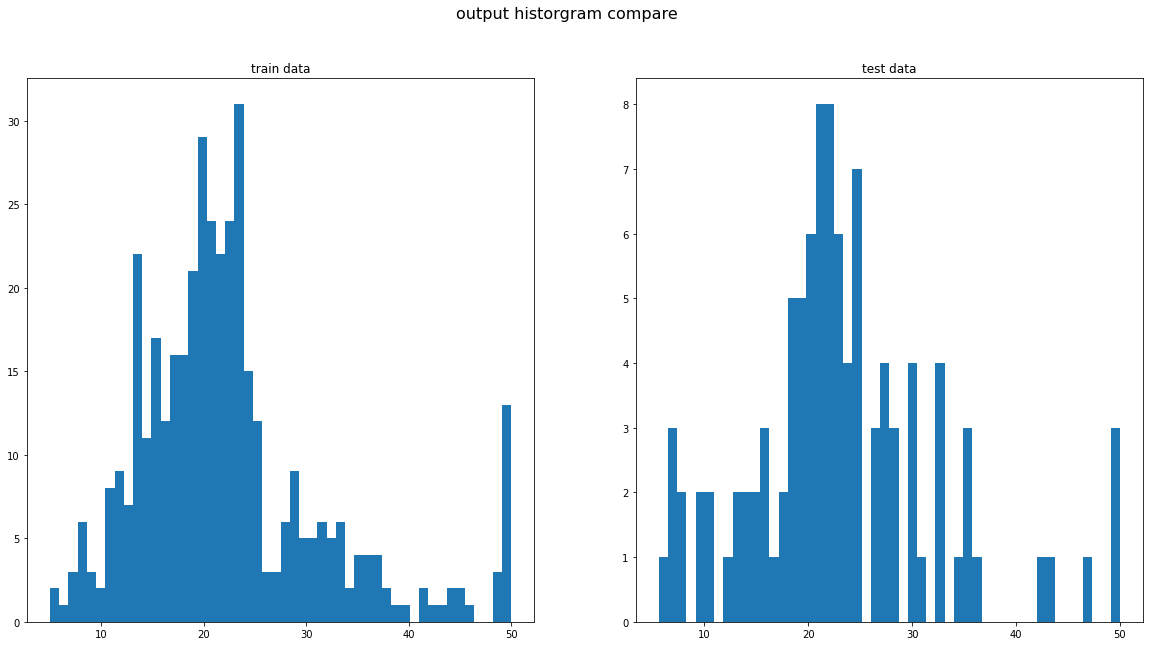

In [6]:
# porównanie charakteru wyjścia danych treningowych i testowych
# kontener na wykresy
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('output historgram compare', fontsize=16)
# wykres treningowego
ax[0].hist(y_train, bins=50)
ax[0].set_title('train data')
# wykres testowego
ax[1].hist(y_test, bins=50)
ax[1].set_title('test data')

plt.show()

### Budowa modelu
- skorzystać z KERAS'a
- model złożony tylko z warstw fully connected (Dense)
- na początek 3 warstwy ukryte po 128, 64, 32 neuronów
- wyjście to jeden neuron

In [7]:
# kontener na model
model = tf.keras.models.Sequential()

In [8]:
# warstwy ukryte
# 1, w niej jest wejściowa, podana jako shape w pierwszej ukrytej
model.add(tf.keras.layers.Dense(128, input_shape=(13,)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.2))
# 2
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.2))
# 3
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.2))

# wyjściowa, zadaniem jest regresja jednej wartości, więc wystarczy jeden neuron
model.add(tf.keras.layers.Dense(1))
# żadnej aktywacji, chcemy mieć wartości ze zbioru liczb rzeczywistych
# żadnego dropout'u, nie chcemy abym nam wyzerowało wartość

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2

In [9]:
# wybieramy optimalizator
opt = tf.keras.optimizers.Adam(learning_rate=0.003)
# kompilujemy
model.compile(optimizer=opt, loss='mean_squared_error', metrics=["mse"])

### Trening i test
- trenujemy i badamy różne ilości epok oraz rozmiary batchy
- test przy pomocy metody wbudowanej evaluate oraz metody r^2 z sklearn

In [10]:
# trenujemy, warto sprawdzić z różną wielkością batcha i epok
model.fit(x_train, y_train, epochs=3000, verbose=0)
print("done")

done


In [15]:
# sprawdzamy w działaniu
model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 66us/sample - loss: 24.3928 - mse: 24.3928


[24.392802818148745, 24.392803]

In [16]:
# policzymy r^2 klasycznie
from sklearn.metrics import r2_score

In [17]:
# liczymy wartości predykowane
y_pred = model.predict(x_test)

In [18]:
# wyznaczamy wartość r^2
r2_score(y_test, y_pred)

0.7069717078448559

In [19]:
# predykcja konkretnych wartości
model.predict(x_test[0:9])

array([[12.464474],
       [19.399029],
       [21.21532 ],
       [34.876053],
       [23.28713 ],
       [21.21532 ],
       [27.740763],
       [23.170914],
       [18.938343]], dtype=float32)

### Wnioski
- wynik nie zadowalający
- warto doać więcej warstw
- można spróbować normalizację danych na wejściu